# **FEATURE ENGINEERING**

We have too many columns with values True/ NaN. We will try to group them by categories. 
<br/> <br/>
 **Diagnoses**
- Respiratory Disorders
- Heart and Cardiovascular Diseases
- Metabolic and Endocrine Disorders
- Neurological Disorders
- Orthopedic Injuries
- Mental Health Conditions
- Reproductive and Pregnancy-related

**Medications**
- Pain Relievers and Analgesics
- Cardiovascular and Blood Pressure Medications
- Infection Medications
- Oral Medications
- Other Medications

**Treatments and Care**
- Therapies and Regimes
- Diagnostic Procedures
- Surgerical Interventions
- Patient Care Management



In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

In [2]:
df = pd.read_csv('../data/learning_data.csv')
df = df.drop('ptnum', axis=1)
df.drop(columns=['C-20565-8'], inplace=True)
df_codes = pd.read_csv('../data/codes.csv')
code_to_name = df_codes.set_index('code')['name'].to_dict()
df = df.rename(columns=code_to_name)
df2 = df.copy()
df.head()

,label,scc,race,marital,ethnic,gender,state,age,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Influenza seasonal injectable preservative free,...,Parainfluenza virus 1 RNA [Presence] in Respiratory specimen by NAA with probe detection,Influenza virus B RNA [Presence] in Respiratory specimen by NAA with probe detection,Influenza virus A RNA [Presence] in Respiratory specimen by NAA with probe detection,Adenovirus A+B+C+D+E DNA [Presence] in Respiratory specimen by NAA with probe detection,SARS-CoV-2 RNA Pnl Resp NAA+probe,Hydroxychloroquine Sulfate 200 MG Oral Tablet,1 ML denosumab 60 MG/ML Prefilled Syringe,Fexofenadine hydrochloride 60 MG Oral Tablet,Leronlimab 700 MG Injection,Lenzilumab 200 MG IV
0,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns = df.columns
unique_columns = list(set(columns))  # Get unique column names

# Create a new DataFrame with combined columns
df_combined = pd.DataFrame()

# Iterate over the unique columns to combine and merge appropriately
for col in unique_columns:
    if list(columns).count(col) > 1:  # If the column name is duplicated
        # Find all columns with this name and combine them, e.g., with first non-null
        combined_series = df[[col]].bfill(axis=1).iloc[:, 0]  # Backfill to combine
        df_combined[col] = combined_series
    else:
        df_combined[col] = df[col]  # If it's unique, just copy the column

print("\nDataFrame after combining columns with the same name:")
print(df_combined)


DataFrame after combining columns with the same name:
     Tobacco smoking status NHIS HIV status Cardiac Arrest  \
0                         former        NaN            NaN   
1                         former        NaN            NaN   
2                         former        NaN            NaN   
3                         former        NaN            NaN   
4                         former        NaN            NaN   
...                          ...        ...            ...   
9043                       never        NaN            NaN   
9044                      former        NaN            NaN   
9045                      former        NaN            NaN   
9046                       never        NaN            NaN   
9047                       never        NaN            NaN   

     Amlodipine 5 MG Oral Tablet  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                   

In [4]:
df2 = df_combined.copy()

### Creating new features

In [5]:
respiratory_disorders_columns = [
    'Acute bacterial sinusitis (disorder)',
    'Acute bronchitis (disorder)',
    'Acute respiratory distress syndrome (disorder)',
    'Acute viral pharyngitis (disorder)',
    'Asthma',
    'Asthma screening',
    'Bacterial infectious disease (disorder)',
    'COVID-19',
    'Chronic obstructive bronchitis (disorder)',
    'Cough (finding)',
    'Dyspnea (finding)',
    'Fever (finding)',
    'Hemoptysis (finding)',
    'Hypoxemia (disorder)',
    'Measurement of respiratory function (procedure)',
    'NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Dose Inhaler',
    'Nasal congestion (finding)',
    'Nasal sinus endoscopy (procedure)',
    'Otitis media',
    'Oxygen Therapy',
    'Pneumococcal conjugate PCV 13',
    'Pneumonia (disorder)',
    'Pulmonary emphysema (disorder)',
    'Respiratory distress (finding)',
    'Sore throat symptom (finding)',
    'Sputum examination (procedure)',
    'Sputum finding (finding)',
    'Streptococcal sore throat (disorder)',
    'Streptococcus pneumoniae group B antigen test',
    'Throat culture (procedure)',
    'Total knee replacement',
    'Transfer to stepdown unit (procedure)',
    'Transplant of lung (procedure)',
    'Viral sinusitis (disorder)',
    'House dust mite (organism)',
    'Mold (organism)',
    'Grass pollen (substance)',
    'Tree pollen (substance)',
    'Animal dander (substance)',
    'Wheezing (finding)'
]

df2['Respiratory Disorders'] = df2[respiratory_disorders_columns].sum(axis=1)


In [6]:
heart_and_cardiovascular_diseases_columns = [
    'Acute deep venous thrombosis (disorder)',
    'Acute pulmonary embolism (disorder)',
    'Atrial Fibrillation',
    'Blindness due to type 2 diabetes mellitus (disorder)',
    'Chronic congestive heart failure (disorder)',
    'Coronary Heart Disease',
    'Diabetes',
    'Diabetic renal disease (disorder)',
    'Diabetic retinopathy associated with type II diabetes mellitus (disorder)',
    'Hyperglycemia (disorder)',
    'Hypertension',
    'Hyperlipidemia',
    'Hypertriglyceridemia (disorder)',
    'Myocardial Infarction',
    'Stroke',
    'Heart failure (disorder)'
]


df2['Heart and Cardiovascular Diseases'] = df2[heart_and_cardiovascular_diseases_columns].sum(axis=1)

In [7]:
metabolic_and_endocrine_disorders_columns = [
    'Alcoholism',
    'Anemia (disorder)',
    'Body mass index 30+ - obesity (finding)',
    'Chronic kidney disease stage 1 (disorder)',
    'Chronic kidney disease stage 2 (disorder)',
    'Chronic kidney disease stage 3 (disorder)',
    'Fatigue (finding)',
    'Gout',
    'Hyperlipidemia',
    'Hypertension',
    'Hypertriglyceridemia (disorder)',
    'Hypoxemia (disorder)',
    'Idiopathic atrophic hypothyroidism',
    'Loss of taste (finding)',
    'Macular edema and retinopathy due to type 2 diabetes mellitus (disorder)',
    'Metabolic syndrome X (disorder)',
    'Microalbuminuria due to type 2 diabetes mellitus (disorder)',
    'Neuropathy due to type 2 diabetes mellitus (disorder)',
    'Nonproliferative diabetic retinopathy due to type 2 diabetes mellitus (disorder)',
    'Osteoarthritis of hip',
    'Osteoarthritis of knee',
    'Osteoporosis (disorder)',
    'Pathological fracture due to osteoporosis (disorder)',
    'Prediabetes',
    'Proteinuria due to type 2 diabetes mellitus (disorder)',
    'Protracted diarrhea',
    'Rheumatoid arthritis',
    'Secondary malignant neoplasm of colon',
    'Stress (finding)',
    'Unhealthy alcohol drinking behavior (finding)',
    'Whiplash injury to neck',
    'Proliferative diabetic retinopathy due to type II diabetes mellitus (disorder)'
]

df2['Metabolic and Endocrine Disorders'] = df2[metabolic_and_endocrine_disorders_columns].sum(axis=1)

In [8]:
neurological_disorders_columns = [
    'Alzheimer\'s disease (disorder)',
    'Brain damage - traumatic',
    'Chronic intractable migraine without aura',
    'Chronic low back pain (finding)',
    'Chronic neck pain (finding)',
    'Chronic pain',
    'Chronic paralysis due to lesion of spinal cord',
    'Chronic sinusitis (disorder)',
    'Epilepsy',
    'Familial Alzheimer\'s disease of early onset (disorder)',
    'Fibromyalgia (disorder)',
    'Lupus erythematosus',
    'Male infertility due to cystic fibrosis (disorder)',
    'Malignant neoplasm of breast (disorder)',
    'Malignant tumor of colon',
    'Seizure disorder',
    'Sepsis (disorder)',
    'Sepsis caused by virus (disorder)',
    'Septic shock (disorder)',
    'Shock (disorder)',
    'Sinusitis (disorder)',
    'Streptococcal sore throat (disorder)',
    'Suspected COVID-19',
    'Transformed migraine (disorder)',
    'Victim of intimate partner abuse (finding)',
    'Viral sinusitis (disorder)',
    'Seizure Count Cerebral Cortex Electroencephalogram (EEG)',
    'Headache (finding)',
    'Primary fibromyalgia syndrome'
]


df2['Neurological Disorders'] = df2[neurological_disorders_columns].sum(axis=1)

In [9]:
orthopedic_injuries_columns = [
    'Admission to orthopedic department',
    'Ankle X-ray',
    'Bone immobilization',
    'Brain damage - traumatic',
    'Bullet wound',
    'Burn injury(morphologic abnormality)',
    'Chronic kidney disease stage 1 (disorder)',
    'Clavicle X-ray',
    'Closed fracture of hip',
    'Concussion injury of brain',
    'Concussion with loss of consciousness',
    'Concussion with no loss of consciousness',
    'Facial laceration',
    'Fracture of ankle',
    'Fracture of clavicle',
    'Fracture of forearm',
    'Fracture of rib',
    'Fracture of the vertebral column with spinal cord injury',
    'Fracture of vertebral column without spinal cord injury',
    'Fracture subluxation of wrist',
    'History of amputation of foot (situation)',
    'History of lower limb amputation (situation)',
    'Hypertriglyceridemia (disorder)',
    'Impacted molars',
    'Injury of anterior cruciate ligament',
    'Injury of heart (disorder)',
    'Injury of kidney (disorder)',
    'Injury of medial collateral ligament of knee',
    'Injury of tendon of the rotator cuff of shoulder',
    'Joint pain (finding)',
    'Laceration of foot',
    'Laceration of hand',
    'Laceration of thigh',
    'Localized  primary osteoarthritis of the hand',
    'Muscle pain (finding)',
    'Rupture of appendix',
    'Rupture of patellar tendon',
    'Second degree burn',
    'Sprain of ankle',
    'Sprain of wrist',
    'Surgical manipulation of joint of knee',
    'Surgical manipulation of shoulder joint',
    'Tear of meniscus of knee',
    'Total knee replacement',
    'Whiplash injury to neck',
    'Third degree burn'
]

df2["Orthopedic Injuries"] = df2[orthopedic_injuries_columns].sum(axis=1)

In [10]:
mental_health_columns = [
    'Alcoholism',
    'At risk for suicide (finding)',
    'Brief general examination (procedure)',
    'Care regimes assessment (procedure)',
    'Comprehensive interview and evaluation (procedure)',
    'Concussion with no loss of consciousness',
    'Depression screening (procedure)',
    'Depression screening using Patient Health Questionnaire Nine Item score (procedure)',
    'Depression screening using Patient Health Questionnaire Two-Item score (procedure)',
    'Died in hospice (finding)',
    'Drug overdose',
    'Evaluation of psychiatric state of patient',
    'Has a criminal record (finding)',
    'Homeless (finding)',
    'Limited social contact (finding)',
    'Mental health Outpatient Note',
    'Mental health Telehealth Note',
    'Mental health screening (procedure)',
    'Misuses drugs (finding)',
    'Nausea (finding)',
    'Not in labor force (finding)',
    'Part-time employment (finding)',
    'Passive conjunctival congestion (finding)',
    'Posttraumatic stress disorder',
    'Psychiatric follow-up',
    'Refugee (person)',
    'Reports of violence in the environment (finding)',
    'Severe anxiety (panic) (finding',
    'Social isolation (finding)',
    'Stress (finding)',
    'Suicide risk assessment (procedure)',
    'Victim of intimate partner abuse (finding)',
    'Attempted suicide - cut/stab',
    'Attempted suicide - suffocation',
    'Opioid abuse (disorder)',
    'Assessment of anxiety (procedure)'
]

df2['Mental Health'] = df2[mental_health_columns].sum(axis=1)

In [11]:
reproductive_and_pregancy_columns = [
    '1 ML medroxyPROGESTERone acetate 150 MG/ML Injection',
    '168 HR Ethinyl Estradiol 0.00146 MG/HR / norelgestromin 0.00625 MG/HR Transdermal System',
    'Antenatal RhD antibody screening',
    'Antepartum eclampsia',
    'Augmentation of labor',
    'Auscultation of the fetal heart',
    'Bilateral tubal ligation',
    'Blighted ovum',
    'Camila 28 Day Pack',
    'Counseling for termination of pregnancy',
    'Cytopathology procedure  preparation of smear  genital source',
    'Episiotomy',
    'Errin 28 Day Pack',
    'Estrostep Fe 28 Day Pack',
    'Etonogestrel 68 MG Drug Implant',
    'Evaluation of uterine fundal height',
    'Excision of fallopian tube and surgical removal of ectopic pregnancy',
    'Fetal anatomy study',
    'Fetus with unknown complication',
    'Gonorrhea infection test',
    'Hyperlipidemia',
    'Induced termination of pregnancy',
    'Insertion of intrauterine contraceptive device',
    'Insertion of subcutaneous contraceptive',
    'Instrumental delivery',
    'Jolivette 28 Day Pack',
    'Kyleena 19.5 MG Intrauterine System',
    'Leronlimab 700 MG Injection',
    'Levonorgestrel 0.00354 MG/HR Drug Implant',
    'Levora 0.15/30 28 Day Pack',
    'Liletta 52 MG Intrauterine System',
    'Medical induction of labor',
    'Mestranol / Norethynodrel [Enovid]',
    'Methotrexate injection into tubal pregnancy',
    'Mirena 52 MG Intrauterine System',
    'Miscarriage in first trimester',
    'Natazia 28 Day Pack',
    'Norinyl 1+50 28 Day Pack',
    'NuvaRing 0.12/0.015 MG per 24HR 21 Day Vaginal Ring',
    'Ortho Tri-Cyclen 28 Day Pack',
    'Preeclampsia',
    'Pregnancy termination care',
    'Premature birth of newborn',
    'Removal of intrauterine device',
    'Removal of subcutaneous contraceptive',
    'Replacement of contraceptive intrauterine device',
    'RhD passive immunization',
    'Screening for chromosomal aneuploidy in prenatal amniotic fluid',
    'Spontaneous breech delivery',
    'Standard pregnancy test',
    'Tubal pregnancy',
    'Ultrasonography of abdomen  right upper quadrant and epigastrium',
    'Ultrasonography of bilateral breasts (procedure)',
    'Ultrasound scan for fetal viability',
    'Vaccination for diphtheria  pertussis  and tetanus',
    'Vasectomy' 
]

df2['Reproductive and Pregnancy'] = df2[reproductive_and_pregancy_columns].sum(axis=1)

In [12]:
pain_relievers_and_analesics_columns = [
    '10 ML Alfentanil 0.5 MG/ML Injection',
    '10 ML Fentanyl 0.05 MG/ML Injection',
    '12 HR Hydrocodone Bitartrate 10 MG Extended Release Oral Capsule',
    '5 ML SUFentanil 0.05 MG/ML Injection',
    '72 HR Fentanyl 0.025 MG/HR Transdermal System',
    'Abuse-Deterrent 12 HR Oxycodone Hydrochloride 10 MG Extended Release Oral Tablet [Oxycontin]',
    'Abuse-Deterrent 12 HR Oxycodone Hydrochloride 15 MG Extended Release Oral Tablet',
    'Acetaminophen 325 MG / oxyCODONE Hydrochloride 2.5 MG Oral Tablet',
    'Acetaminophen 325 MG / oxyCODONE Hydrochloride 5 MG Oral Tablet',
    'Acetaminophen 500 MG Oral Tablet',
    'Acetaminophen 300 MG / Hydrocodone Bitartrate 5 MG Oral Tablet',
    'Acetaminophen 325 MG / HYDROcodone Bitartrate 7.5 MG Oral Tablet',
    'Acetaminophen 325 MG / Oxycodone Hydrochloride 10 MG Oral Tablet [Percocet]',
    'Acetaminophen 325 MG Oral Tablet',
    'Acetaminophen/Hydrocodone',
    'Aspirin',
    'Aspirin 81 MG Oral Tablet',
    'Carbamazepine[Tegretol]',
    'Chlorpheniramine Maleate 4 MG Oral Tablet',
    'Clopidogrel 75 MG Oral Tablet',
    'Colchicine 0.6 MG Oral Tablet',
    'Cyclophosphamide 1000 MG Injection',
    'Diazepam 5 MG Oral Tablet',
    'Diazepam 5 MG/ML Injectable Solution',
    'Doxycycline Monohydrate 100 MG Oral Tablet',
    'Ibuprofen',
    'Ibuprofen 200 MG Oral Tablet',
    'Ibuprofen 400 MG Oral Tablet [Ibu]',
    'Lorazepam 2 MG/ML Injectable Solution',
    'Meperidine Hydrochloride 50 MG Oral Tablet',
    'Muscle pain (finding)',
    'Naproxen 500 MG Oral Tablet',
    'Naproxen sodium 220 MG Oral Tablet',
    'Nitroglycerin 0.4 MG/ACTUAT Mucosal Spray',
    'Phenazopyridine hydrochloride 100 MG Oral Tablet',
    'Sulfamethoxazole / Trimethoprim',
    'buprenorphine 2 MG / naloxone 0.5 MG Sublingual Tablet',
    'diphenhydrAMINE Hydrochloride 25 MG Oral Tablet',
    'duloxetine 20 MG Delayed Release Oral Capsule',
    'methadone hydrochloride 10 MG Oral Tablet',
    'tramadol hydrochloride 50 MG Oral Tablet',
    'clonazePAM 0.25 MG Oral Tablet',
    'Midazolam 1 MG/ML Injectable Solution',
    'Rocuronium bromide 10 MG/ML Injectable Solution',
    'Epidural anesthesia',
]

df2['Pain Relievers and Analesics'] = df2[pain_relievers_and_analesics_columns].sum(axis=1)

In [13]:
cardiovascular_and_blood_pressure_medications_columns = [
    '0.3 ML Enoxaparin sodium 100 MG/ML Prefilled Syringe',
    '0.4 ML Enoxaparin sodium 100 MG/ML Prefilled Syringe',
    '1 ML Enoxaparin sodium 150 MG/ML Prefilled Syringe',
    '1 ML heparin sodium  porcine 5000 UNT/ML Injection',
    '3 ML Amiodarone hydrocholoride 50 MG/ML Prefilled Syringe',
    '4 ML norepinephrine 1 MG/ML Injection',
    'Acute deep venous thrombosis (disorder)',
    'Acute pulmonary embolism (disorder)',
    'Alteplase 100 MG Injection',
    'Assessment using New York Heart Association Classification (procedure)',
    'Atorvastatin 80 MG Oral Tablet',
    'Atropine Sulfate 1 MG/ML Injectable Solution',
    'Captopril 25 MG Oral Tablet',
    'Cardiac Arrest',
    'Cardiovascular stress testing (procedure)',
    'Catheter ablation of tissue of heart',
    'Coronary artery bypass grafting',
    'Digoxin 0.125 MG Oral Tablet',
    'Echocardiography (procedure)',
    'Electrical cardioversion',
    'Electrocardiographic procedure',
    'Furosemide 40 MG Oral Tablet',
    'History of myocardial infarction (situation)',
    'Hydrochlorothiazide 25 MG Oral Tablet',
    'Implantation of left ventricular assist device (procedure)',
    'Insertion of biventricular implantable cardioverter defibrillator',
    'Lisinopril',
    'Myocardial Infarction',
    'Nitrofurantoin 5 MG/ML Oral Suspension',
    'Peripheral blood smear interpretation',
    'Referral to hypertension clinic',
    'Shock (disorder)',
    'Stroke',
    'Transplantation of heart (procedure)',
    'Verapamil Hydrochloride 40 MG',
    'Warfarin Sodium 5 MG Oral Tablet',
    'carvedilol 25 MG Oral Tablet',
    'lisinopril 10 MG Oral Tablet',
    'lisinopril 20 MG Oral Tablet',
    'losartan potassium 25 MG Oral Tablet',
    'losartan potassium 50 MG Oral Tablet',
    'sacubitril 97 MG / valsartan 103 MG Oral Tablet',
    'remifentanil 2 MG Injection',
    'pregabalin 100 MG Oral Capsule'
]

df2['Cardiovascular and Blood Pressure'] = df2[cardiovascular_and_blood_pressure_medications_columns].sum(axis=1)

In [14]:
injection_medications_columns = [
    '10 ML Doxorubicin Hydrochloride 2 MG/ML Injection',
    '10 ML oxaliplatin 5 MG/ML Injection',
    '1 ML DOCEtaxel 20 MG/ML Injection',
    '1 ML Epinephrine 1 MG/ML Injection',
    '1 ML Morphine Sulfate 5 MG/ML Injection',
    '1 ML Vasopressin (USP) 20 UNT/ML Injection',
    '10 ML Fluorouracil 50 MG/ML Injection',
    '10 ML Pamidronate Disodium 3 MG/ML Injection',
    '100 ML Epirubicin Hydrochloride 2 MG/ML Injection',
    '100 ML Propofol 10 MG/ML Injection',
    '100 ML zoledronic acid 0.04 MG/ML Injection',
    '150 ML vancomycin 5 MG/ML Injection',
    '2 ML Ondansetron 2 MG/ML Injection',
    '20 ML tocilizumab 20 MG/ML Injection',
    '5 ML hyaluronidase-oysk 2000 UNT/ML / trastuzumab 120 MG/ML Injection',
    'pneumococcal polysaccharide vaccine  23 valent',
    'remdesivir 100 MG Injection',
    'zoster',
    'Aztreonam 2000 MG Injection',
    'cefdinir', 
    'Cefdinir',
    'doxycycline hyclate 100 MG',
    'Ampicillin 100 MG/ML Injectable Solution',
    'Penicillin G 375 MG/ML Injectable Solution',
    'Penicillin V',
    'Paclitaxel 100 MG Injection',
    'Piperacillin 4000 MG / tazobactam 500 MG Injection',
    'Leucovorin 100 MG Injection',
    'Influenza  seasonal  injectable  preservative free',
    'Syphilis infection test',
    'Skin test for tuberculosis',
    'Urine culture'
]


df2['Injection Medications'] = df2[injection_medications_columns].sum(axis=1)

In [15]:
oral_medications_columns = [
    '12 HR Cefaclor 500 MG Extended Release Oral Tablet',
    '24 HR Donepezil hydrochloride 10 MG / Memantine hydrochloride 28 MG Extended Release Oral Capsule',
    '24 HR Metformin hydrochloride 500 MG Extended Release Oral Tablet',
    'Acetaminophen 300 MG / Codeine Phosphate 15 MG Oral Tablet',
    'Acetaminophen 325 MG Oral Tablet [Tylenol]',
    'Alendronic acid 10 MG Oral Tablet',
    'Allopurinol 100 MG Oral Tablet',
    'Amlodipine 5 MG Oral Tablet',
    'Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet',
    'Amoxicillin 250 MG Oral Capsule',
    'Aspirin 81 MG Oral Tablet',
    'Astemizole 10 MG Oral Tablet',
    'Atorvastatin 80 MG Oral Tablet',
    'Azithromycin 250 MG Oral Tablet',
    'Azithromycin 250mg',
    'Cefuroxime 250 MG Oral Tablet',
    'Chlorpheniramine Maleate 4 MG Oral Tablet',
    'Clopidogrel 75 MG Oral Tablet',
    'Colchicine 0.6 MG Oral Tablet',
    'Diazepam 5 MG Oral Tablet',
    'Digoxin 0.125 MG Oral Tablet',
    'Donepezil hydrochloride 10 MG Oral Tablet',
    'Donepezil hydrochloride 23 MG Oral Tablet',
    'Doxycycline Monohydrate 100 MG Oral Tablet',
    'Fexofenadine hydrochloride 60 MG Oral Tablet',
    'Furosemide 40 MG Oral Tablet',
    'Galantamine 4 MG Oral Tablet',
    'Hydrochlorothiazide 25 MG Oral Tablet',
    'Levothyroxine Sodium 0.075 MG Oral Tablet',
    'Loratadine 10 MG Oral Tablet',
    'Methotrexate 2.5 MG Oral Tablet',
    'Milnacipran hydrochloride 100 MG Oral Tablet',
    'Nitrofurantoin 5 MG/ML Oral Suspension',
    'Penicillin V Potassium 500 MG Oral Tablet',
    'Phenazopyridine hydrochloride 100 MG Oral Tablet',
    'Sertraline 100 MG Oral Tablet',
    'Simvastatin 10 MG Oral Tablet',
    'Simvastatin 20 MG Oral Tablet',
    'Tacrine 10 MG Oral Capsule',
    'Tamoxifen 10 MG Oral Tablet',
    'Terfenadine 60 MG Oral Tablet',
    'Verapamil Hydrochloride 40 MG',
    'Verzenio 100 MG Oral Tablet',
    'Warfarin Sodium 5 MG Oral Tablet',
    'palbociclib 100 MG Oral Capsule',
    'predniSONE 20 MG Oral Tablet',
    'ribociclib 200 MG Oral Tablet',
    'neratinib 40 MG Oral Tablet',
    'Hydroxychloroquine Sulfate 200 MG Oral Tablet',
    'chloroquine phosphate 500 MG Oral Tablet',
    'Naltrexone hydrochloride 50 MG Oral Tablet',
    'lapatinib 250 MG Oral Tablet',
    'cetirizine hydrochloride 10 MG Oral Tablet',
    'cycloSPORINE  modified 100 MG Oral Capsule',
    'letrozole 2.5 MG Oral Tablet',
    'exemestane 25 MG Oral Tablet',
    'ferrous sulfate 325 MG Oral Tablet'
    
]

df2['Oral Medications'] = df2[oral_medications_columns].sum(axis=1)

In [16]:
other_medications_columns = [
    '0.25 ML Leuprolide Acetate 30 MG/ML Prefilled Syringe',
    '1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen]',
    '1 ML denosumab 60 MG/ML Prefilled Syringe',
    '10 ML Furosemide 10 MG/ML Injection',
    '3 ML liraglutide 6 MG/ML Pen Injector',
    '5 ML fulvestrant 50 MG/ML Prefilled Syringe',
    '12 HR Cefaclor 500 MG Extended Release Oral Tablet',
    '120 ACTUAT Fluticasone propionate 0.044 MG/ACTUAT Metered Dose Inhaler',
    '60 ACTUAT Fluticasone propionate 0.25 MG/ACTUAT / salmeterol 0.05 MG/ACTUAT Dry Powder Inhaler',
    'Acetaminophen 21.7 MG/ML / Dextromethorphan Hydrobromide 1 MG/ML / doxylamine succinate 0.417 MG/ML Oral Solution',
    'Chlamydia antigen test',
    'Hepatitis B Surface Antigen Measurement',
    'Hepatitis C antibody test',
    'Human immunodeficiency virus antigen test',
    'Insulin Lispro 100 UNT/ML Injectable Solution [Humalog]',
    'Jolivette 28 Day Pack',
    'Measurement of Varicella-zoster virus antibody',
    'Memantine hydrochloride 2 MG/ML Oral Solution',
    'NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Dose Inhaler',
    'NDA020800 0.3 ML Epinephrine 1 MG/ML Auto-Injector',
    'NITROFURANTOIN  MACROCRYSTALS 50 MG Oral Capsule',
    'Ortho Tri-Cyclen 28 Day Pack',
    'Pneumococcal conjugate PCV 13',
    'Pulmozyme (Dornase Alfa)',
    'SARS-COV-2 (COVID-19) vaccine  mRNA  spike protein  LNP  preservative free  100 mcg/0.5mL dose',
    'SARS-COV-2 (COVID-19) vaccine  mRNA  spike protein  LNP  preservative free  30 mcg/0.3mL dose',
    'SARS-COV-2 (COVID-19) vaccine  vector non-replicating  recombinant spike protein-Ad26  preservative free  0.5 mL',
    'Seasonique 91 Day Pack',
    'Td (adult) preservative free',
    'Trinessa 28 Day Pack',
    'Vaccination for diphtheria  pertussis  and tetanus',
    'Vitamin B 12 5 MG/ML Injectable Solution',
    'Vomiting symptom (finding)',
    'Yaz 28 Day Pack',
    'ado-trastuzumab emtansine 100 MG Injection',
    'albuterol 5 MG/ML Inhalation Solution',
    'amLODIPine 2.5 MG Oral Tablet',
    'anastrozole 1 MG Oral Tablet',
    'baricitinib 2 MG Oral Tablet',
    'buprenorphine 2 MG / naloxone 0.5 MG Sublingual Tablet',
    'carvedilol 25 MG Oral Tablet',
    'sevoflurane 1000 MG/ML Inhalant Solution',
    'Latex (substance)',
    'desflurane 1000 MG/ML Inhalation Solution',
    'Isoflurane 999 MG/ML Inhalant Solution',
    'Hydrocortisone 10 MG/ML Topical Cream',
    'Lenzilumab 200 MG IV',
    'remifentanil 2 MG Injection',
    'Carboplatin 10 MG/ML Injectable Solution',
    'chloroquine phosphate 500 MG Oral Tablet',
    'Naltrexone hydrochloride 50 MG Oral Tablet',
    'lapatinib 250 MG Oral Tablet',
    'Sodium Chloride 9 MG/ML Injectable Solution',
    'insulin human  isophane 70 UNT/ML / Regular Insulin  Human 30 UNT/ML Injectable Suspension [Humulin]'
]


df2['Other Medications'] = df2[other_medications_columns].sum(axis=1)

In [17]:
therapies_and_regimes_columns = [
    '24hr nicotine transdermal patch',
    'Assessment of health and social care needs (procedure)',
    'Assessment of substance use (procedure)',
    'Assessment using Alcohol Use Disorders Identification Test - Consumption (procedure)',
    'Assessment using Morse Fall Scale (procedure)',
    'Cognitive and behavioral therapy (regime/therapy)',
    'Combined chemotherapy and radiation therapy (procedure)',
    'Comprehensive interview and evaluation (procedure)',
    'Construction of diverting colostomy',
    'Controlled ventilation procedure and therapy  initiation and management (procedure)',
    'Coordination of care plan (procedure)',
    'Home health aide service (regime/therapy)',
    'Hospice care (regime/therapy)',
    'Interstitial brachytherapy (procedure)',
    'Intracavitary brachytherapy (procedure)',
    'Monitoring of patient (regime/therapy)',
    'Movement therapy (regime/therapy)',
    'Nursing care/supplementary surveillance (regime/therapy)',
    'Occupational therapy (regime/therapy)',
    'Physical examination',
    'Physical therapy procedure (regime/therapy)',
    'Professional / ancillary services care (regime/therapy)',
    'Psychosocial care (regime/therapy)',
    'Pulmonary rehabilitation (regime/therapy)',
    'Radiation oncology AND/OR radiotherapy (procedure)',
    'Radiation therapy care (regime/therapy)',
    'Referral to home health care service (procedure)',
    'Referral to hypertension clinic',
    'Social case work (regime/therapy)',
    'Speech and language therapy regime (regime/therapy',
    'Subcutaneous immunotherapy',
    'Teleradiotherapy procedure (procedure)',
    'Transplant of lung (procedure)',
    'Transplantation of heart (procedure)',
    'Weaning from mechanically assisted ventilation (procedure)',
    'Microbial culture (procedure)',
    'Chemotherapy (procedure)'
]


df2['Therapies and Regimes'] = df2[therapies_and_regimes_columns].sum(axis=1)

In [18]:
diagnostic_procedures_columns = [
    'Biopsy of breast (procedure)',
    'Biopsy of colon',
    'Biopsy of prostate',
    'Blood typing  RH typing',
    'Bone density scan (procedure)',
    'Chlamydia antigen test',
    'Clavicle X-ray',
    'Colonoscopy',
    'Digital examination of rectum',
    'Echocardiography (procedure)',
    'Electrocardiographic procedure',
    'Human epidermal growth factor receptor 2 gene detection by fluorescence in situ hybridization (procedure)',
    'Human epidermal growth factor receptor 2 gene detection by immunohistochemistry (procedure)',
    'Human immunodeficiency virus antigen test',
    'Initial patient assessment (procedure)',
    'Knee X-ray',
    'Magnetic resonance imaging of breast (procedure)',
    'Mammogram - symptomatic (procedure)',
    'Mammography (procedure)',
    'Manual pelvic examination (procedure)',
    'Measurement of Varicella-zoster virus antibody',
    'Measurement of respiratory function (procedure)',
    'Nasal sinus endoscopy (procedure)',
    'Pelvis X-ray',
    'Plain chest X-ray (procedure)',
    'Screening for domestic abuse (procedure)',
    'Screening for drug abuse (procedure)',
    'Screening for occult blood in feces (procedure)',
    'Screening mammography (procedure)',
    'Sentinel lymph node biopsy (procedure)',
    'Spirometry (procedure)',
    'Throat culture (procedure)',
    'Upper arm X-ray',
    'X-ray or wrist',
    'Seizure Count Cerebral Cortex Electroencephalogram (EEG)',
    'Allergy screening test',
    'Alpha-fetoprotein test',
    'Bilirubin.total [Presence] in Urine by Test strip',
    'Urine screening for glucose',
    'Urine screening test for diabetes',
    'Urine protein test',
    'Hemoglobin / Hematocrit / Platelet count',
    'Assessment of anxiety (procedure)',
    'Urine culture'
]


df2['Diagnostic Procedures'] = df2[diagnostic_procedures_columns].sum(axis=1)

In [19]:
surgerical_interventions_columns = [
    'Admission to burn unit',
    'Admission to long stay hospital',
    'Admission to neurosurgical department',
    'Admission to trauma surgery department',
    'Admit to ICU (procedure)',
    'Amputation of right foot',
    'Amputation of right leg',
    'Appendectomy',
    'Artificial respiration (procedure)',
    'Brachytherapy of breast (procedure)',
    'Catheter ablation of tissue of heart',
    'Coronary artery bypass grafting',
    'Excision of axillary lymph node (procedure)',
    'Excision of breast tissue (procedure)',
    'Excision of sentinel lymph node (procedure)',
    'Extraction of wisdom tooth',
    'Implantation of left ventricular assist device (procedure)',
    'Induced termination of pregnancy',
    'Insertion of biventricular implantable cardioverter defibrillator',
    'Insertion of endotracheal tube (procedure)',
    'Instrumental delivery',
    'Intubation',
    'Laparoscopic Removal of Gall Bladder',
    'Lumpectomy of breast (procedure)',
    'Lung volume reduction surgery (procedure)',
    'Open Removal of Gall Bladder',
    'Partial resection of colon',
    'Percutaneous coronary intervention',
    'Percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance',
    'Prostatectomy',
    'Rectal polypectomy',
    'Removal of endotracheal tube (procedure)',
    'Removal of subcutaneous contraceptive',
    'Surgical manipulation of joint of knee',
    'Surgical manipulation of shoulder joint',
    'Suture open wound',
    'Tear of meniscus of knee',
    'Transplantation of heart (procedure)'
]
df2['Surgical Interventions'] = df2[surgerical_interventions_columns].sum(axis=1)

In [20]:
patient_care_management_columns = [
    'Assessment of health and social care needs (procedure)',
    'Bleeding from anus',
    'Bullet wound',
    'Chronic low back pain (finding)',
    'Contact dermatitis',
    'Cystitis',
    'Diarrhea symptom (finding)',
    'Escherichia coli urinary tract infection',
    'Evaluation of psychiatric state of patient',
    'Facial laceration',
    'First degree burn',
    'Heart failure education (procedure)',
    'Hemodialysis (procedure)',
    'Hep A  adult',
    'History AND physical examination (procedure)',
    'History of amputation of foot (situation)',
    'History of appendectomy',
    'History of cardiac arrest (situation)',
    'History of lower limb amputation (situation)',
    'History of single seizure (situation)',
    'Hospital admission  short-term  24 hours',
    'Information gathering (procedure)',
    'Injection of tetanus antitoxin',
    'Intramuscular injection',
    'Intravenous blood transfusion of packed cells (procedure)',
    'Intravenous injection (procedure)',
    'Laceration of foot',
    'Laceration of forearm',
    'Laceration of hand',
    'Laceration of thigh',
    'Medication Reconciliation (procedure)',
    'Movement therapy (regime/therapy)',
    'Notifications (procedure)',
    'Oxygen administration by mask (procedure)',
    'Patient discharge (procedure)',
    'Placing subject in prone position (procedure)',
    'Postoperative procedure education (procedure)',
    'Pre-discharge assessment (procedure)',
    'Radiation oncology AND/OR radiotherapy (procedure)',
    'Referral to home health care service (procedure)',
    'Referral to hypertension clinic',
    'Renal dialysis (procedure)',
    'Resuscitation using intravenous fluid (procedure)',
    'Review of systems (procedure)',
    'Rubella screening',
    'Screening mammography (procedure)',
    'Subcutaneous immunotherapy',
    'Teleradiotherapy procedure (procedure)',
    'Transfer to stepdown unit (procedure)',
    'Transfusion of plasma (procedure)',
    'Weaning from mechanically assisted ventilation (procedure)',
    'piperacillin 2000 MG / tazobactam 250 MG Injection',
    'vancomycin 1000 MG Injection',
    'Recurrent urinary tract infection',
    'Acquired coagulation disorder (disorder)',
    'Primary malignant neoplasm of colon',
    'Pyelonephritis',
    'Chill (finding)',
    'Acute Cholecystitis',
    'Cholelithiasis',
    'Appendicitis',
    'Metastasis from malignant tumor of prostate (disorder)',
    'Overlapping malignant neoplasm of colon',
    'Polyp of colon',
    'Neoplasm of prostate',
    'Carcinoma in situ of prostate (disorder)',
    'Recurrent rectal polyp',
    'Discharge from skilled nursing facility (procedure)',
    'Certification procedure (procedure)',
    'Development of individualized plan of care (procedure)'
]

df2['Patient Care Management'] = df2[patient_care_management_columns].sum(axis=1)

In [21]:
categories = ['Respiratory Disorders', 'Heart and Cardiovascular Diseases', 'Metabolic and Endocrine Disorders', 'Neurological Disorders', 'Orthopedic Injuries', 'Mental Health', 'Reproductive and Pregnancy', 'Pain Relievers and Analesics', 'Cardiovascular and Blood Pressure', 'Injection Medications', 'Oral Medications', 'Other Medications', 'Therapies and Regimes', 'Diagnostic Procedures', 'Surgical Interventions', 'Patient Care Management']

Type of these column is object, we will convert them to int.

In [22]:
for col in df2.columns:
    # print data type of column
    print(f"Column: {col}") 
    print(f"Data Type: {df2[col].dtype}")
    if col in categories:
        # change data type to numeric
        df2[col] = pd.to_numeric(df2[col], errors='coerce')
        print(f"Data Type: {df2[col].dtype}")

Column: Tobacco smoking status NHIS
Data Type: object
Column: HIV status
Data Type: object
Column: Cardiac Arrest
Data Type: object
Column: Amlodipine 5 MG Oral Tablet
Data Type: object
Column: Human epidermal growth factor receptor 2 gene detection by immunohistochemistry (procedure)
Data Type: object
Column: Partial resection of colon
Data Type: object
Column: 24hr nicotine transdermal patch
Data Type: object
Column: Septic shock (disorder)
Data Type: object
Column: Injury of anterior cruciate ligament
Data Type: object
Column: Nonproliferative diabetic retinopathy due to type 2 diabetes mellitus (disorder)
Data Type: object
Column: Ultrasound scan for fetal viability
Data Type: object
Column: Appearance of Urine
Data Type: object
Column: Etonogestrel 68 MG Drug Implant
Data Type: object
Column: 10 ML Fentanyl 0.05 MG/ML Injection
Data Type: object
Column: Latex IgE Ab in Serum
Data Type: object
Column: Chronic kidney disease stage 1 (disorder)
Data Type: object
Column: Replacement o

### Dropping unnecessary columns

Not important columns

In [23]:
unimportant_columns = ['race', 'ethnic', 'state', 'Social migrant (finding)', 'Lack of access to transportation (finding)', 'Transport problems (finding)', 'Full-time employment (finding)', 'Face mask (physical object)', 'Childbirth', 'Cesarean section', 'Normal pregnancy', 'Non-low risk pregnancy']
df2.drop(columns=unimportant_columns, inplace=True)

Columns used in new features

In [24]:
used_columns = respiratory_disorders_columns + heart_and_cardiovascular_diseases_columns + metabolic_and_endocrine_disorders_columns + neurological_disorders_columns + orthopedic_injuries_columns + mental_health_columns + reproductive_and_pregancy_columns + pain_relievers_and_analesics_columns + cardiovascular_and_blood_pressure_medications_columns + injection_medications_columns + oral_medications_columns + other_medications_columns + therapies_and_regimes_columns + diagnostic_procedures_columns + surgerical_interventions_columns + patient_care_management_columns
df2.drop(columns=used_columns, inplace=True)

Columns with only null values

In [25]:
null_values = df2.isnull().sum()
null_values = null_values[null_values > 0]
null_values = 100 * null_values / len(df2)
null_values = null_values.sort_values(ascending=False)
null_values_df = null_values.reset_index()
null_values_df.columns = ['Column', 'Null Values Percentage']
print(tabulate(null_values_df, headers='keys', tablefmt='simple', showindex=False))

Column                                                                                                  Null Values Percentage
----------------------------------------------------------------------------------------------------  ------------------------
Sweat Test                                                                                                         100
Cystic Fibrosis                                                                                                    100
Suicidal deliberate poisoning                                                                                      100
20 Gene mutation test                                                                                              100
Oral Glucose Tolerance Test                                                                                        100
Total replacement of hip                                                                                           100
History of upper limb amputation

In [26]:
# drop columns with only null values
null_columns = df2.columns[df2.isnull().all()]
print(null_columns)
df2.dropna(axis=1, how='all', inplace=True)

Index(['History of disarticulation at wrist (situation)',
       'Body mass index 40+ - severely obese (finding)', 'Cystic Fibrosis',
       '0.67 ML anakinra 149 MG/ML Prefilled Syringe',
       'History of upper limb amputation (situation)', 'Take blood sample',
       'Intravenous antibiotic therapy', 'Total replacement of hip',
       'Suicidal deliberate poisoning', '20 Gene mutation test',
       'Oral Glucose Tolerance Test', 'Sepsis caused by Staphylococcus aureus',
       'Diabetes from Cystic Fibrosis', 'canagliflozin 100 MG Oral Tablet',
       'Sputum Culture', 'Vancomycin 50 MG/ML Injectable Solution',
       'Sepsis caused by Pseudomonas (disorder)', 'Lung Transplant',
       'Bee venom (substance)', 'Pancreatin 600 MG Oral Tablet',
       'Infection caused by Staphylococcus aureus', 'Sweat Test',
       'Incision of trachea (procedure)', 'Intravenous infusion (procedure)'],
      dtype='object')


In [27]:
len(df2.columns)

177

### Encoding

#### Age 

In [28]:
df_one_hot = pd.get_dummies(df2['age'], prefix='age')
df2 = pd.concat([df2, df_one_hot], axis=1)
df2['age_30t50'] = df2['age_30t50'].astype(int)
df2['age_50t70'] = df2['age_50t70'].astype(int)
df2['age_gt70'] = df2['age_gt70'].astype(int)
df2.drop(columns=['age'], inplace=True)

#### Columns with normal/abnormal values

In [29]:
n_abn_columns = []
for col in df2.columns:
    if df2[col].isin(['normal', 'abnormal']).any():
        n_abn_columns.append(col)
n_abn_columns.sort()
for col in n_abn_columns:
    print(col)

Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma
Albumin
Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma
American house dust mite IgE Ab in Serum
Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma
Bilirubin.total [Mass/volume] in Serum or Plasma
Bilirubin.total [Mass/volume] in Urine by Test strip
Body Mass Index
Body temperature
Calcium
Calcium [Mass/volume] in Serum or Plasma
Carbon Dioxide
Cat dander IgE Ab in Serum
Chloride
Chloride [Moles/volume] in Serum or Plasma
Cladosporium herbarum IgE Ab in Serum
Codfish IgE Ab in Serum
Common Ragweed IgE Ab in Serum
Cow milk IgE Ab in Serum
Creatinine
DXA [T-score] Bone density
Diastolic Blood Pressure
Egg white IgE Ab in Serum
Erythrocyte distribution width [Entitic volume] by Automated count
Erythrocyte distribution width [Ratio] by Automated count
Erythrocytes [#/volume] in Blood by Automated count
FEV1/FVC
Ferritin [Mass/volume] in Serum or Plasma
Globulin [Mass/volume] i

How many null values are in these columns?

In [30]:
n_abn_df = df2[n_abn_columns]
null_values = n_abn_df.isnull().sum()
null_values = null_values[null_values > 0]
null_values = 100 * null_values / len(n_abn_df)
null_values = null_values.sort_values(ascending=False)
null_values_df = null_values.reset_index()
null_values_df.columns = ['Column', 'Null Values Percentage']
print(tabulate(null_values_df, headers='keys', tablefmt='simple', showindex=False))

Column                                                                            Null Values Percentage
------------------------------------------------------------------------------  ------------------------
Thyroxine (T4) free [Mass/volume] in Serum or Plasma                                          99.4695
Thyrotropin [Units/volume] in Serum or Plasma                                                 99.4695
Mean blood pressure                                                                           98.2427
Oxygen Saturation                                                                             98.2427
Lactate [Mass/volume] in Blood                                                                98.2427
Honey bee IgE Ab in Serum                                                                     96.5517
Latex IgE Ab in Serum                                                                         96.5517
Peanut IgE Ab in Serum                                                      

Many of them have > 90 % null values. We will drop them.

In [31]:
null_values_cols = []
for col in n_abn_columns:
    if df2[col].isnull().sum()/len(df2) > 0.9:
        null_values_cols.append(col)
print('Number of columns to drop:', len(null_values_cols))
df2.drop(columns=null_values_cols, inplace=True)

Number of columns to drop: 21


In [32]:
null_values_cols

['American house dust mite IgE Ab in Serum',
 'Cat dander IgE Ab in Serum',
 'Cladosporium herbarum IgE Ab in Serum',
 'Codfish IgE Ab in Serum',
 'Common Ragweed IgE Ab in Serum',
 'Cow milk IgE Ab in Serum',
 'Egg white IgE Ab in Serum',
 'FEV1/FVC',
 'Honey bee IgE Ab in Serum',
 'Lactate [Mass/volume] in Blood',
 'Latex IgE Ab in Serum',
 'Mean blood pressure',
 'Oxygen Saturation',
 'Peanut IgE Ab in Serum',
 'Shrimp IgE Ab in Serum',
 'Soybean IgE Ab in Serum',
 'Thyrotropin [Units/volume] in Serum or Plasma',
 'Thyroxine (T4) free [Mass/volume] in Serum or Plasma',
 'Walnut IgE Ab in Serum',
 'Wheat IgE Ab in Serum',
 'White oak IgE Ab in Serum']

Rest of them will be encoded using get_dummies.

In [33]:
n_abn_columns = [col for col in n_abn_columns if col not in null_values_cols]
df2 = pd.get_dummies(df2, columns=n_abn_columns, prefix_sep='_', dtype=int)

Other non-numeric columns will be encoded using get_dummies.

In [34]:
# what columns are still not numeric?
for col in df2.columns:
    print(col)
    print(df2[col].unique())

Tobacco smoking status NHIS
['former' 'never' nan]
HIV status
[nan 'negative' 'positive']
Appearance of Urine
[nan 'cloudy']
HER2 [Presence] in Breast cancer specimen by Immune stain
[nan 'positive' 'negative']
Protein [Presence] in Urine by Test strip
[nan '3+' '1+' '2+']
label
[0 1]
Abuse Status [OMAHA]
[nan 'no' 'severe']
Ketones [Mass/volume] in Urine by Test strip
[nan 'low' 'medium']
Oxygen [Partial pressure] in Arterial blood
[  nan 51.12 47.66 46.48 46.73 50.86 46.94 48.78 45.2  49.18 51.67 45.34
 49.25 45.85 45.67 50.47 48.48 50.48 47.68 49.42 50.88 49.85 45.5  52.16
 49.49 52.44 47.32 51.72 49.15 50.62 49.89 50.76 48.15 47.25 47.62 52.65
 50.46 49.28 45.59 50.74 46.21 51.1  46.07 47.76 47.8  48.39 51.85 47.72
 49.47 48.27 51.13 48.64 47.26 49.61 48.47 44.14 47.54 48.61 50.63 44.49
 46.43 50.29 46.88 49.34 47.93 50.36 49.38 50.79 49.99 46.85 50.82 48.83
 47.18 50.11 50.18 48.5  46.03 49.96 48.82 49.55 48.25 47.63 51.36 48.94
 46.91 48.05 49.56 49.94 48.97 48.12 52.19 47.19 49.

In [35]:
columns_to_encode = [
    'HER2 [Presence] in Breast cancer specimen by FISH',
    'Parainfluenza virus 1 RNA [Presence] in Respiratory specimen by NAA with probe detection',
    'Estrogen+Progesterone receptor Ag [Presence] in Tissue by Immune stain',
    'Ketones [Mass/volume] in Urine by Test strip',
    'marital',
    'Abuse Status [OMAHA]',
    'Interleukin 6 [Mass/volume] in Serum or Plasma',
    'Progesterone receptor Ag [Presence] in Breast cancer specimen by Immune stain',
    'Influenza virus A RNA [Presence] in Respiratory specimen by NAA with probe detection',
    'Parainfluenza virus 2 RNA [Presence] in Respiratory specimen by NAA with probe detection',
    'Response to cancer treatment',
    'Estrogen receptor Ag [Presence] in Breast cancer specimen by Immune stain',
    'Hemoglobin [Presence] in Urine by Test strip',
    'Housing status',
    'Influenza virus B RNA [Presence] in Respiratory specimen by NAA with probe detection',
    'Objective assessment of cardiovascular disease NYHA',
    'Drugs of abuse 5 panel - Urine by Screen method',
    'Leukocyte esterase [Presence] in Urine by Test strip',
    'Adenovirus A+B+C+D+E DNA [Presence] in Respiratory specimen by NAA with probe detection',
    'Protein [Presence] in Urine by Test strip',
    'Appearance of Urine',
    'Capillary refill [Time] of Nail bed',
    'Treatment status Cancer',
    'Gram positive blood culture panel by Probe in Positive blood culture',
    'Glucose [Presence] in Urine by Test strip',
    'Respiratory syncytial virus RNA [Presence] in Respiratory specimen by NAA with probe detection',
    'Functional capacity NYHA',
    'Color of Urine',
    'Nitrite [Presence] in Urine by Test strip',
    'Tumor marker Cancer',
    'Tobacco smoking status NHIS',
    'gender',
    'HIV status',
    'Are you covered by health insurance or some other kind of health care plan [PhenX]',
    'Human metapneumovirus RNA [Presence] in Respiratory specimen by NAA with probe detection',
    'Ketones [Presence] in Urine by Test strip',
    'Clarity of Urine',
    'Stage group.clinical Cancer',
    'Rhinovirus RNA [Presence] in Respiratory specimen by NAA with probe detection',
    'HER2 [Presence] in Breast cancer specimen by Immune stain',
    'Smokes tobacco daily',
    'Parainfluenza virus 3 RNA [Presence] in Respiratory specimen by NAA with probe detection',
    'SARS-CoV-2 RNA Pnl Resp NAA+probe',
    'Influenza virus A Ag [Presence] in Nasopharynx by Rapid immunoassay',
    'Influenza virus B Ag [Presence] in Nasopharynx by Rapid immunoassay'
]

df2 = pd.get_dummies(df2, columns=columns_to_encode, prefix_sep='_', dtype=int)

Let's see one more time if we have any null values.

In [36]:
null_values = df2.isnull().sum()
null_values = null_values[null_values > 0]
null_values = 100 * null_values / len(df2)
null_values = null_values.sort_values(ascending=False)
null_values_df = null_values.reset_index()
null_values_df.columns = ['Column', 'Null Values Percentage']
print(tabulate(null_values_df, headers='keys', tablefmt='simple', showindex=False))

Column                                                                                                  Null Values Percentage
----------------------------------------------------------------------------------------------------  ------------------------
Oxygen [Partial pressure] in Arterial blood                                                                            98.6848
Bicarbonate [Moles/volume] in Arterial blood                                                                           98.6848
pH of Arterial blood                                                                                                   98.6848
Oxygen/Inspired gas setting [Volume Fraction] Ventilator                                                               98.6848
Carbon dioxide [Partial pressure] in Arterial blood                                                                    98.6848
White Blood Cell (Elevated)                                                                                    

In [37]:
for col in df2.columns:
    print(col)
    print(df2[col].unique())

label
[0 1]
Oxygen [Partial pressure] in Arterial blood
[  nan 51.12 47.66 46.48 46.73 50.86 46.94 48.78 45.2  49.18 51.67 45.34
 49.25 45.85 45.67 50.47 48.48 50.48 47.68 49.42 50.88 49.85 45.5  52.16
 49.49 52.44 47.32 51.72 49.15 50.62 49.89 50.76 48.15 47.25 47.62 52.65
 50.46 49.28 45.59 50.74 46.21 51.1  46.07 47.76 47.8  48.39 51.85 47.72
 49.47 48.27 51.13 48.64 47.26 49.61 48.47 44.14 47.54 48.61 50.63 44.49
 46.43 50.29 46.88 49.34 47.93 50.36 49.38 50.79 49.99 46.85 50.82 48.83
 47.18 50.11 50.18 48.5  46.03 49.96 48.82 49.55 48.25 47.63 51.36 48.94
 46.91 48.05 49.56 49.94 48.97 48.12 52.19 47.19 49.6  45.09 47.38 51.84
 47.11 47.75 49.19 50.25 48.7  48.72 49.37 48.16 48.43 45.03 47.79 50.33
 47.89 49.95]
Total Bilirubin (Elevated)
[nan 2.4 1.3 1.9 2.2 1.6 2.3 1.7 1.2 1.4 1.5 2.5 2.1 2.  1.8]
Lymphocytes/100 leukocytes in Blood by Automated count
[  nan 15.09 14.29 15.67 15.57 15.17 16.88 16.07 12.23 14.82 13.94 13.37
 15.79 15.31 12.33 14.09 16.49 14.18 15.02 13.84 12.7  1

Other NaN values will be filled with median values.

In [38]:
df2 = df2.fillna(df2.median())

Saving medians to fill validation data.

### Corelations

In [39]:
X_train = df2.drop('label', axis=1)
y_train = df2['label']

#### Correlations between features

In [40]:
X_corr = X_train.corr().abs()

high_corr = []
to_drop = set()

for i in range(len(X_corr.columns)):
    for j in range(i+1, len(X_corr.columns)):
        if X_corr.iloc[i, j] > .98:
            col_1 = X_corr.columns[i]
            col_2 = X_corr.columns[j]
            corr = X_corr.iloc[i, j]
            high_corr.append((col_1, col_2, corr))
            to_drop.add(col_2)

In [41]:
print("Columns with correlation > 0.98:")
for i in range(10):
    print(high_corr[i][0], "<->", high_corr[i][1], ":", high_corr[i][2])

Columns with correlation > 0.98:
Bilirubin.total [Mass/volume] in Serum or Plasma_abnormal <-> Ferritin [Mass/volume] in Serum or Plasma_abnormal : 0.9959728153860173
Body Mass Index_abnormal <-> Body Mass Index_normal : 0.9839742527296425
Calcium_normal <-> Urea Nitrogen_normal : 1.0
Calcium [Mass/volume] in Serum or Plasma_normal <-> Urea nitrogen [Mass/volume] in Serum or Plasma_normal : 1.0
Diastolic Blood Pressure_abnormal <-> Diastolic Blood Pressure_normal : 0.9975674506121095
Diastolic Blood Pressure_abnormal <-> Systolic Blood Pressure_abnormal : 0.9926660729264255
Diastolic Blood Pressure_abnormal <-> Systolic Blood Pressure_normal : 0.9902281695048286
Diastolic Blood Pressure_normal <-> Systolic Blood Pressure_abnormal : 0.990249500799651
Diastolic Blood Pressure_normal <-> Systolic Blood Pressure_normal : 0.9926925140325418
Ferritin [Mass/volume] in Serum or Plasma_normal <-> Iron [Mass/volume] in Serum or Plasma_normal : 0.9889332332718642


In [42]:
len(to_drop)

47

We will drop one of the features if they are highly correlated.

In [43]:
X_train.drop(to_drop, axis=1, inplace=True)

#### Corelations between previously created features and target

In [44]:
def get_sorted_correlations(X, cols, target):
    # Calculate correlations with target for each column in cols
    correlations = {}
    for col in cols:
        if col not in X.columns:
            print(f"Column '{col}' not found in the DataFrame")
            continue
        if X[col].dropna().nunique() > 1:
            if X[col].dtype == 'object':
                X[col] = X[col].astype('category').cat.codes
            correlation = target.dropna().corr(X[col].dropna())
            correlations[col] = round(correlation, 2)

    # Sort correlations in descending order
    sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
    
    return sorted_correlations


In [45]:
categories_correlations = get_sorted_correlations(X_train, categories, y_train)

print(tabulate(categories_correlations, headers=["Column", "Correlation with Target"], tablefmt="simple"))

Column                               Correlation with Target
---------------------------------  -------------------------
Diagnostic Procedures                                  -0.52
Patient Care Management                                -0.5
Metabolic and Endocrine Disorders                      -0.44
Other Medications                                      -0.44
Injection Medications                                  -0.36
Cardiovascular and Blood Pressure                      -0.34
Heart and Cardiovascular Diseases                      -0.33
Neurological Disorders                                 -0.33
Reproductive and Pregnancy                             -0.33
Respiratory Disorders                                  -0.32
Mental Health                                          -0.28
Pain Relievers and Analesics                           -0.28
Therapies and Regimes                                  -0.23
Surgical Interventions                                 -0.23
Orthopedic Injuries      

Saving medians to fill validation data.

In [46]:
import json
X_train.median()
with open('medians.json', 'w') as f:
    json.dump(X_train.median().to_dict(), f)

### First modeling

In [47]:
# save x_train and y_train to csv
X_train.to_csv('../transformed_data/X_train.csv', index=False)
y_train.to_csv('../transformed_data/y_train.csv', index=False)

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB

In [49]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
def calculate_metrics(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    precision = precision_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    gini = 2 * auc - 1
    return accuracy, recall, precision, f1, auc, gini

def print_metrics(models, X_train, y_train, X_val, y_val):
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC', 'Gini'])
    for model in models:
        accuracy, recall, precision, f1, auc, gini = calculate_metrics(model, X_train, y_train, X_val, y_val)
        results.loc[len(results)] = {'Model': model.__class__.__name__,
                                        'Accuracy': accuracy,
                                        'Recall': recall,
                                        'Precision': precision,
                                        'F1 Score': f1,
                                        'AUC': auc,
                                        'Gini': gini}
    print(tabulate(results, headers='keys', tablefmt='simple'))

In [50]:
models = [DecisionTreeClassifier(), 
          MLPClassifier(),
          GaussianNB(), 
          GradientBoostingClassifier(), 
          AdaBoostClassifier(),
          RandomForestClassifier(),
         LogisticRegression(),
         SVC(probability=True),
         KNeighborsClassifier(),
         ExtraTreesClassifier(),
         BaggingClassifier(),
         BernoulliNB()
        ]

In [51]:
print('Training data')
print_metrics(models, X_train, y_train, X_train, y_train)

Training data
    Model                         Accuracy    Recall    Precision    F1 Score       AUC      Gini
--  --------------------------  ----------  --------  -----------  ----------  --------  --------
 0  DecisionTreeClassifier        1         1            1           1         1         1
 1  MLPClassifier                 0.984527  0.940122     0.998607    0.968483  0.999251  0.998502
 2  GaussianNB                    0.61649   0.983392     0.395987    0.564617  0.745811  0.491622
 3  GradientBoostingClassifier    0.994584  0.983392     0.995135    0.989228  0.999602  0.999205
 4  AdaBoostClassifier            0.992153  0.978147     0.990704    0.984385  0.999619  0.999238
 5  RandomForestClassifier        1         1            1           1         1         1
 6  LogisticRegression            0.982317  0.95542      0.974153    0.964695  0.996748  0.993495
 7  SVC                           0.946729  0.789336     1           0.882267  0.963216  0.926432
 8  KNeighborsClassi

In [52]:
from matplotlib import pyplot as plt
from sklearn import metrics
def roc_curve_plot(models, X_train, y_train, X_val, y_val):
    plt.figure(0).clf()
    plt.figure(figsize=(8, 8))
    plt.title("ROC Curve for Different Models (Training Data)")
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(y_val, y_pred)
        auc = round(metrics.roc_auc_score(y_val, y_pred), 4)
        model_name = model.__class__.__name__  
        if model_name == 'Pipeline':
            model_name = model['model'].__class__.__name__
        plt.plot(fpr, tpr, label=f"{model_name}, AUC={auc}")
    plt.legend(framealpha=0.0)

<Figure size 432x288 with 0 Axes>

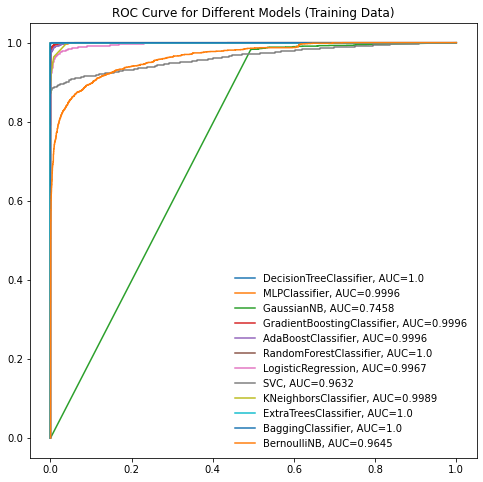

In [53]:
roc_curve_plot(models, X_train, y_train, X_train, y_train)

### Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [55]:
def cross_validate_calculate_scores(models, X, y, scoring):
    results = {}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for model in models:
        model_name = model.__class__.__name__
        for score, score_name in scoring.items():  
            scores_result = cross_val_score(model, X, y, cv=skf, scoring=score)
            results[(model_name, score_name)] = scores_result
        
    return results

In [56]:
scoring = {'roc_auc': 'roc_auc', 'f1': 'f1', 'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}
cross_val_scores = cross_validate_calculate_scores(models, X_train, y_train, scoring)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cross_validate_scores(cross_val_scores, scoring):
    sns.set_palette(sns.color_palette('hls', 8))
    num_metrics = len(scoring)
    fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 3 * num_metrics), sharex=True, sharey=False)

    scores_by_metric = {}
    for (model_name, metric_name), scores in cross_val_scores.items():
        if metric_name not in scores_by_metric:
            scores_by_metric[metric_name] = {}
        scores_by_metric[metric_name][model_name] = scores

    for i, (metric_name, scores) in enumerate(scores_by_metric.items()):
        min_score = min(min(scores) for scores in scores_by_metric[metric_name].values())
        max_score = max(max(scores) for scores in scores_by_metric[metric_name].values())
        sns.boxplot(data=list(scores.values()), ax=axes[i])
        axes[i].set_ylim(min_score - 0.01, max_score + 0.01)
        axes[i].set_xticklabels(scores.keys(), rotation=45, fontsize=10)
        axes[i].set_title(metric_name)
        axes[i].set_ylabel('Score')
    fig.suptitle('Cross-validation scores')
    plt.tight_layout()
    plt.show()
    return scores_by_metric


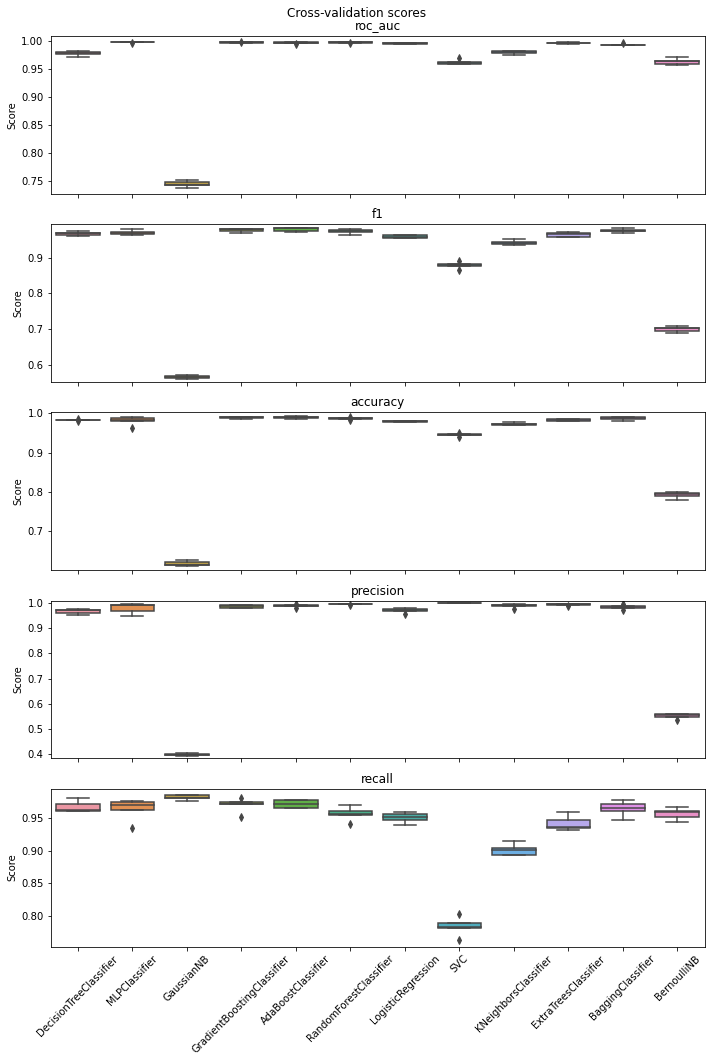

In [58]:
scores_by_metric = plot_cross_validate_scores(cross_val_scores, scoring)

In [59]:
headers = ["Model", "Metric", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Mean"]

table_data = []
for metric, classifiers in scores_by_metric.items():
    for classifier, scores in classifiers.items():
        row = [classifier, metric] + list(scores) + [sum(scores) / len(scores)]
        table_data.append(row)

print(tabulate(table_data, headers=headers))

Model                       Metric       Fold 1    Fold 2    Fold 3    Fold 4    Fold 5      Mean
--------------------------  ---------  --------  --------  --------  --------  --------  --------
DecisionTreeClassifier      roc_auc    0.979873  0.981687  0.971879  0.982433  0.977671  0.978709
MLPClassifier               roc_auc    0.998912  0.99887   0.998763  0.998587  0.997632  0.998553
GaussianNB                  roc_auc    0.752191  0.737028  0.743017  0.748565  0.743148  0.74479
GradientBoostingClassifier  roc_auc    0.997837  0.99876   0.997455  0.996957  0.997898  0.997781
AdaBoostClassifier          roc_auc    0.995736  0.998194  0.997287  0.997755  0.997959  0.997386
RandomForestClassifier      roc_auc    0.998537  0.999064  0.998236  0.997711  0.996173  0.997944
LogisticRegression          roc_auc    0.99704   0.996559  0.996226  0.995583  0.995554  0.996192
SVC                         roc_auc    0.969975  0.963131  0.959823  0.960533  0.958628  0.962418
KNeighborsClassifier 